In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2M

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
img_gene=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input,
                rotation_range=30,            # Rotate images up to 30 degrees
                width_shift_range=0.2,        # Shift the width by up to 20%
                height_shift_range=0.2,       # Shift the height by up to 20%
                shear_range=0.2,              # Shear by up to 20%
                zoom_range=0.2,               # Zoom in/out by up to 20%
                horizontal_flip=True,         # Enable horizontal flipping
                brightness_range=[0.8, 1.2]
)

In [5]:
import os
# os.getcwd()
os.listdir()

['.virtual_documents']

In [6]:
train_path='/kaggle/input/dogs-vs-cats/train'
test_path='/kaggle/input/dogs-vs-cats/test'

In [7]:
train_batch = img_gene.flow_from_directory(directory=train_path,batch_size=128,target_size=(480,480))
test_batch = img_gene.flow_from_directory(directory=test_path,batch_size=128,target_size=(480,480))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [8]:
effnet = EfficientNetV2M(include_top=False)
effnet.summary()

214201816/214201816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "efficientnetv2-m"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        648 │ rescaling[0][0]   │
│                     │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      5,184 │ stem_activation[… │
│ (Conv2D)            │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, None,      │          0 │ block1a_project_… │
│                     │ None, 24)         │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, None,      │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, None,      │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, None,      │          0 │ block1b_project_… │
│ (Activation)        │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, None,      │          0 │ block1b_project_… │
│ (Dropout)           │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, None,      │          0 │ block1b_drop[0][… │
│                     │ None, 24)         │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, None,      │      5,184 │ block1b_add[0][0] │
│ (Conv2D)            │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, None,      │         96 │ block1c_project_… │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, None,      │          0 │ block1c_project_

 Total params: 53,150,388 (202.75 MB)

 Trainable params: 52,858,356 (201.64 MB)

 Non-trainable params: 292,032 (1.11 MB)

In [9]:
avg = keras.layers.GlobalAveragePooling2D()(effnet.output)
first_dense = (keras.layers.Dense(200,activation='relu'))(avg)
output=keras.layers.Dense(2,activation='softmax')(first_dense)
model = keras.models.Model(inputs=effnet.input,outputs=output)

In [10]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        648 │ rescaling[0][0]   │
│                     │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │         96 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │      5,184 │ stem_activation[… │
│ (Conv2D)            │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, None,      │         96 │ block1a_project_… │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, None,      │          0 │ block1a_project_… │
│ (Activation)        │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_add (Add)   │ (None, None,      │          0 │ block1a_project_… │
│                     │ None, 24)         │            │ stem_activation[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, None,      │      5,184 │ block1a_add[0][0] │
│ (Conv2D)            │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, None,      │         96 │ block1b_project_… │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, None,      │          0 │ block1b_project_… │
│ (Activation)        │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, None,      │          0 │ block1b_project_… │
│ (Dropout)           │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, None,      │          0 │ block1b_drop[0][… │
│                     │ None, 24)         │            │ block1a_add[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_co… │ (None, None,      │      5,184 │ block1b_add[0][0] │
│ (Conv2D)            │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_bn  │ (None, None,      │         96 │ block1c_project_… │
│ (BatchNormalizatio… │ None, 24)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1c_project_ac… │ (None, None,      │          0 │ block1c_project_

 Total params: 53,406,990 (203.73 MB)

 Trainable params: 53,114,958 (202.62 MB)

 Non-trainable params: 292,032 (1.11 MB)

In [11]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss',patience=7,restore_best_weights=True)
check_point= ModelCheckpoint(filepath='catvsdog weights.keras',save_best_only=False,save_weights_only=False,mode='auto',save_freq=1,verbose=1,monitor='val_loss') 

In [12]:
for layer in effnet.layers:
    layer.trainable=False

In [13]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [14]:
test_batch[0][0].shape

(128, 480, 480, 3)

In [15]:
model.fit(train_batch,validation_data=test_batch,verbose=1,epochs=7,batch_size=128)

Epoch 1/7


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727880970.845718      93 service.cc:145] XLA service 0x7ee7a8103b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727880970.845776      93 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727880970.845782      93 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2024-10-02 14:57:53.545116: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng3{k11=2} for conv (f32[128,1056,30,30]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,1056,30,30]{3,2,1,0}, f32[1056,1,3,3]{3

157/157 ━━━━━━━━━━━━━━━━━━━━ 2115s 12s/step - accuracy: 0.9720 - loss: 0.0734 - val_accuracy: 0.9956 - val_loss: 0.0124
Epoch 2/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 1678s 10s/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9954 - val_loss: 0.0121
Epoch 3/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 1678s 10s/step - accuracy: 0.9966 - loss: 0.0104 - val_accuracy: 0.9952 - val_loss: 0.0132
Epoch 4/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 1680s 10s/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9938 - val_loss: 0.0139
Epoch 5/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 1677s 10s/step - accuracy: 0.9972 - loss: 0.0086 - val_accuracy: 0.9942 - val_loss: 0.0141
Epoch 6/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 1682s 10s/step - accuracy: 0.9965 - loss: 0.0086 - val_accuracy: 0.9968 - val_loss: 0.0107
Epoch 7/7
157/157 ━━━━━━━━━━━━━━━━━━━━ 1677s 10s/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9958 - val_loss: 0.0112


In [16]:
for layer in effnet.layers:
    layer.trainable=True

In [17]:
model.save('model.h5')

In [18]:
result  = model.fit(train_batch,validation_data=test_batch,verbose=1,epochs=3,callbacks=[early_stopping,check_point],batch_size=128)

Epoch 1/3

Epoch 1: saving model to catvsdog weights.keras
  1/157 ━━━━━━━━━━━━━━━━━━━━ 3:06:35 72s/step - accuracy: 1.0000 - loss: 0.0083
Epoch 1: saving model to catvsdog weights.keras
  2/157 ━━━━━━━━━━━━━━━━━━━━ 23:33 9s/step - accuracy: 1.0000 - loss: 0.0063   
Epoch 1: saving model to catvsdog weights.keras
  3/157 ━━━━━━━━━━━━━━━━━━━━ 23:09 9s/step - accuracy: 1.0000 - loss: 0.0057
Epoch 1: saving model to catvsdog weights.keras
  4/157 ━━━━━━━━━━━━━━━━━━━━ 22:47 9s/step - accuracy: 1.0000 - loss: 0.0056
Epoch 1: saving model to catvsdog weights.keras
  5/157 ━━━━━━━━━━━━━━━━━━━━ 22:33 9s/step - accuracy: 0.9997 - loss: 0.0058
Epoch 1: saving model to catvsdog weights.keras
  6/157 ━━━━━━━━━━━━━━━━━━━━ 22:37 9s/step - accuracy: 0.9995 - loss: 0.0059
Epoch 1: saving model to catvsdog weights.keras
  7/157 ━━━━━━━━━━━━━━━━━━━━ 22:39 9s/step - accuracy: 0.9994 - loss: 0.0058
Epoch 1: saving model to catvsdog weights.keras
  8/157 ━━━━━━━━━━━━━━━━━━━━ 22:26 9s/step - accuracy: 0.999

In [19]:
print('alwa')

alwa


In [20]:
loss,acc =model.evaluate(test_batch)
print(f'test loss: {loss:.4f} , test accuracy: {acc:.4f}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.9956 - loss: 0.0104
test loss: 0.0101 , test accuracy: 0.9960


In [86]:
import os
import random
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

In [81]:
def get_images (num_of_images ,folder_name):
    image_folder = test_path+'/'+str(folder_name)

# Get a list of all files in the folder
    image_files = [file for file in os.listdir(image_folder) if file.endswith(('png', 'jpg', 'jpeg'))]

    # Randomly select 5 images
    selected_images = random.sample(image_files, num_of_images)
    returned_images = []
    plt.figure(figsize=(10, 10))
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)
        image = image.resize((480,480))
        returned_images.append(image)
    return returned_images

In [101]:
def get_label(img):
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    pred=model.predict(img_array)
    label = np.argmax(pred) # label
    name='Dog'if label ==1 else 'Cat'
    acc = pred[0][label]
    return acc,name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


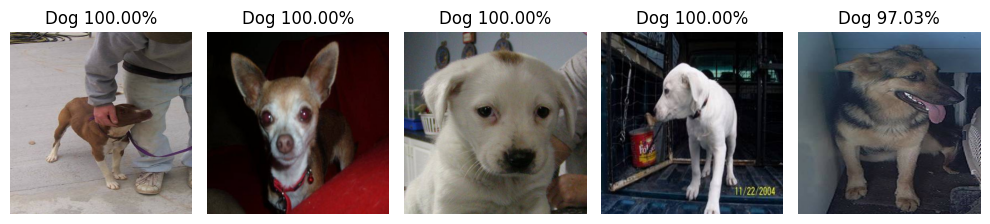

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


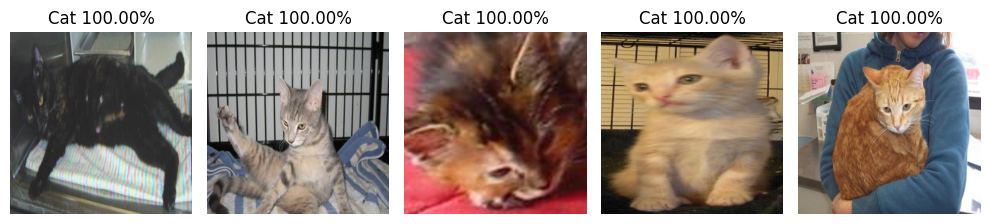

In [107]:
file_names = os.listdir(test_path)
gg=[]
for file_name in file_names:
    images=get_images(5,file_name)
    images = random.sample(images,5)
    for i,img in enumerate(images,1) :
        ax=plt.subplot(1, 5, i)  # Create a subplot for each image
        plt.imshow(img)
        gg=img
        acc,name = get_label(img)
        plt.title(f'{name} {acc*100:.2f}%')
        plt.axis('off')
    plt.tight_layout()
    plt.show()